In [1]:
import pandas as pd
import numpy as np
import pathlib
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(0)

In [2]:
dataset_path = "D:\\Storage\\AnomalyDetection\\wine\\benchmarks"

In [3]:
file_list = list(pathlib.Path(dataset_path).glob('*'))
print(f"Number of files: {len(file_list)}")
print(f"Example path: {file_list[0]}")

Number of files: 1210
Example path: D:\Storage\AnomalyDetection\wine\benchmarks\wine_benchmark_0001.csv


In [4]:
df = pd.read_csv(file_list[0])
df.describe()

,original.label,diff.score,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000
mean,5.833648,0.182961,-0.015088,-0.002474,0.004425,-0.003911,-0.011658,0.005770,0.006552,-0.017944,-0.008731,0.006213,0.009173
std,0.878879,0.179670,0.979572,1.015064,0.998171,0.988028,0.974637,1.027255,1.001732,0.986455,0.990001,0.978650,1.005466
min,3.000000,0.002303,-2.557251,-1.577208,-2.192664,-1.017956,-1.342536,-1.663455,-1.941631,-2.529997,-3.100376,-2.091774,-2.089189
25%,5.000000,0.060985,-0.628884,-0.666110,-0.472297,-0.765739,-0.514759,-0.762016,-0.667787,-0.832580,-0.674810,-0.680540,-0.831551
50%,6.000000,0.126008,-0.243211,-0.301671,-0.059409,-0.524031,-0.257863,-0.085936,0.057596,0.034471,-0.115064,-0.142926,-0.160811
75%,6.000000,0.237099,0.373866,0.366468,0.491108,0.537383,0.227386,0.590143,0.712210,0.741450,0.631264,0.461889,0.677615
max,9.000000,0.983355,6.698910,7.533774,9.230570,5.497655,15.840967,14.562446,5.736815,5.203424,4.238516,9.534111,3.695947


In [5]:
df.head()

,point.id,motherset,origin,original.label,diff.score,ground.truth,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,wine_point_3594,wine,regression,7,0.050492,nominal,-1.245962,-0.362411,-0.265853,-0.261304,-0.343495,1.209882,0.747594,-0.899276,0.817846,-0.613338,0.174560
1,wine_point_5089,wine,regression,5,0.082237,anomaly,0.759540,0.973867,0.215849,-0.534540,0.598458,-0.536656,0.199134,0.968217,0.071518,0.596292,-0.915394
2,wine_point_1912,wine,regression,6,0.290201,nominal,-0.088942,-0.969809,-0.403482,-0.870829,-0.429127,-0.592996,-0.791633,-0.699187,-1.110168,1.402712,-0.496181
3,wine_point_4908,wine,regression,5,0.053559,anomaly,0.219597,0.973867,0.284664,0.138039,0.427194,-0.762016,-0.243173,1.034913,0.817846,1.805921,0.006874
4,wine_point_2246,wine,regression,7,0.420300,nominal,0.219597,-0.180191,-0.541112,0.348220,-0.714567,-0.142276,0.446826,-0.242318,-0.363840,-1.016548,0.090717


In [6]:
df = df.drop(columns=["point.id", "motherset", "origin", "original.label", "diff.score"])

In [7]:
df.isnull().sum()

ground.truth            0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
data = df.copy()
data.shape

(3703, 12)

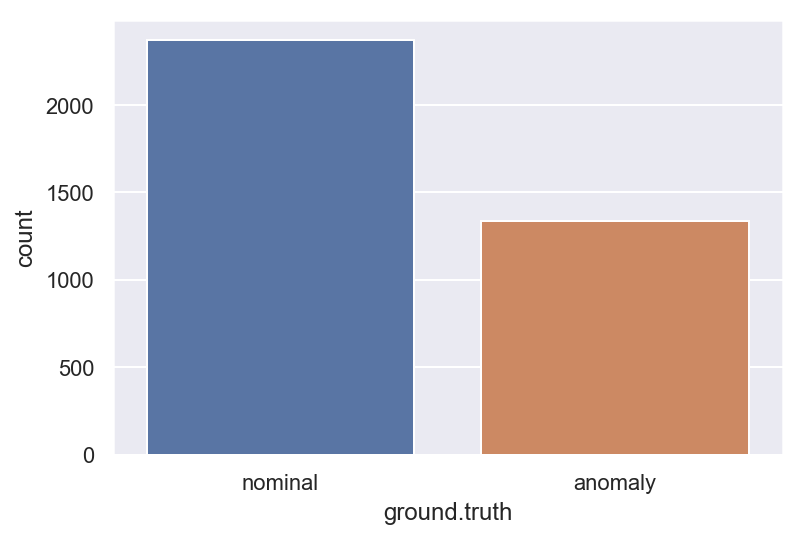

In [9]:
sns.set(style = "darkgrid")
sns.countplot(x = "ground.truth", data=data)

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df["ground.truth"] = enc.fit_transform(df["ground.truth"])

<Figure size 1296x360 with 0 Axes>

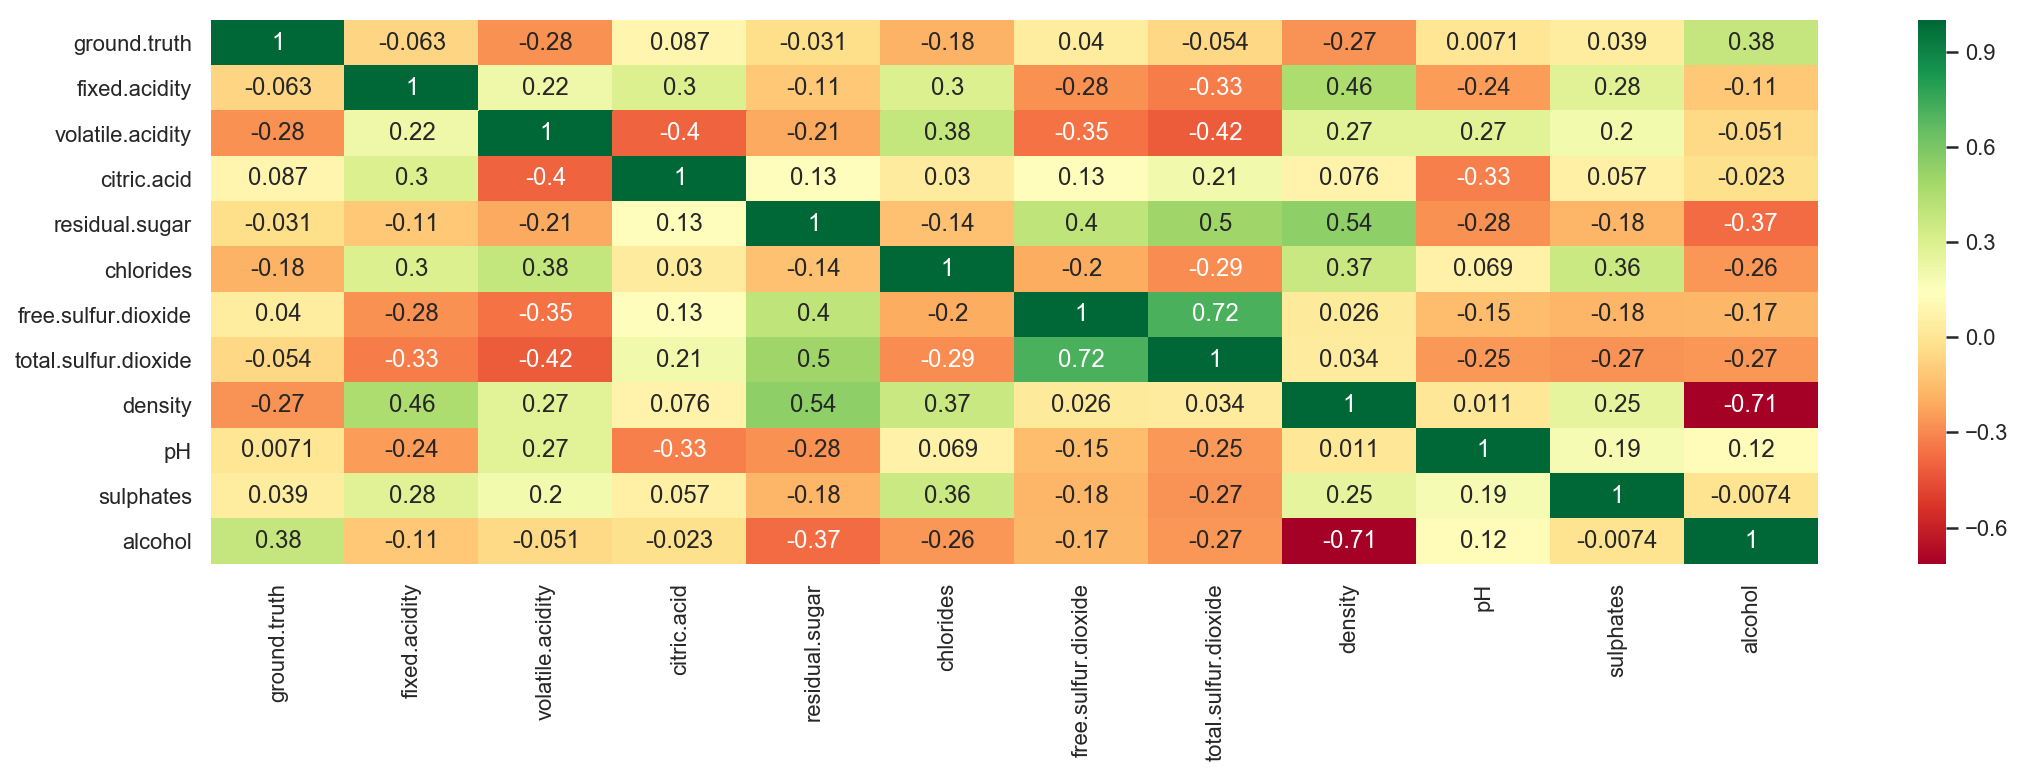

In [11]:
data = df.copy()
plt.figure(figsize=(18,5))
sns.heatmap(data.corr(),annot=True,cmap = "RdYlGn")

In [12]:
data_y = data["ground.truth"]
data_x = data.drop(columns = ["ground.truth"])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [23]:
sample = X_test.to_numpy()[0]
clf.predict(np.reshape(sample, (1, -1)))

array([1])

In [15]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7489878542510121


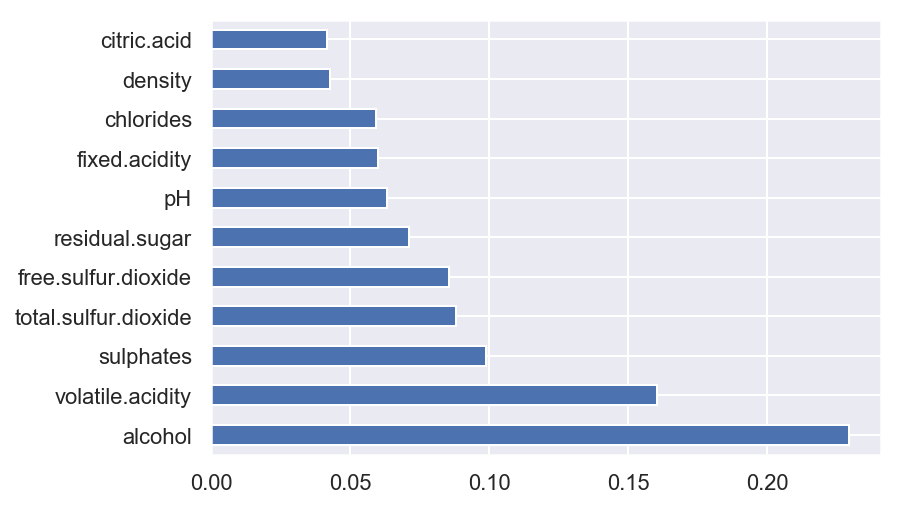

In [31]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [32]:
from sklearn.feature_selection import RFE

model = DecisionTreeClassifier(criterion="entropy", max_depth=10)
rfe = RFE(model, 4)
fit=rfe.fit(X_train,y_train)

print(X_train.columns)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Num Features: 4
Selected Features: [False  True False False False False  True False  True False  True]
Feature Ranking: [7 1 8 4 5 3 1 6 1 2 1]


In [36]:
data_x.columns[fit.support_]

Index(['volatile.acidity', 'total.sulfur.dioxide', 'pH', 'alcohol'], dtype='object')